In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [21]:
#Parámetros
vi= 1
nu = 0.2
h = 0.02
R = vi*h/nu

#Fronteras
x_0 = 5
y_0 = 5
x_1 = 25
y_1 = 30


N = 51
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

U = np.zeros((N,N))
W = np.zeros((N,N))

#Se usarán las condiciones de frontera demostradas en el archivo pdf
def vortex(U,W):
    
    
    for i in range(x_0,x_1+1):
        W[i,0]= -2*(U[i,1] - U[i,0])/(h**2) 
        W[i,-1] = -2*(U[i,-2] - U[i,-1])/(h**2) 
        
    
    for j in range(N-y_1,N-y_0+1):
        W[0,j]= -2*(U[1,j] - U[0,j])/(h**2)
        W[-1,j] = -2*(U[-2,j] - U[-1,j])/(h**2) 
        
def boundaries(U,W):
    for i in range(y_0,y_1+1):
        for j in range(x_0,x_1+1):
            U[x_0,j], U[x_1,j] = 0,0
            U[i,y_0], U[i,y_1] = 0,0
    
def velocity(U,W):
    
    for i in range(len(x)):
        U[-1,i] = U[-2,i] + vi*h*y[-1] 
        U[0,i] = U[1,i]
        U[i,0] = U[i,1]
        U[i,-1] = U[i,-2]
        
#Método del repositorio del curso
def GetSolution(Nit = 1000, omega = 0.7, tol=1e-5):
    for it in range(Nit):
        velocity(U,W)
        vortex(U,W)
        boundaries(U,W)
        
        dmax1 = 0
        dmax2 = 0
        
        #U
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                if (y_1 +1>i > y_0+1) and (x_1 +1> j > x_0+1):
                    U[i,j], W[i,j] = 0,0
                    
                else:
                    u_1 = 0.25*(U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1] + W[i,j]*h**2)
                    u_2 = omega*(u_1 - U[i,j])
                    U[i,j]+=u_2
                    
                    if np.abs(u_2) > dmax1:
                        dmax1 = u_2
        # W
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                if (x_1 +1>i > x_0+1) and (y_1 +1> j > y_0+1):
                    U[i,j], W[i,j] = 0,0
                    
                else:
                    w_1 = 0.25*(W[i,j+1]+W[i,j-1]+W[i-1,j]+W[i+1,j])
                    w_2 = -(R/16)*(U[i,j+1]-U[i,j-1])*(W[i+1,j]-W[i-1,j])
                    w_3 = (R/16)*(W[i,j+1]-W[i,j-1])*(U[i+1,j]-U[i-1,j])
                    red_w = omega*(w_1+w_2+w_3-W[i,j])
                    W[i,j] += red_w
                    
                    if np.abs(red_w) > dmax2:
                        dmax2 = red_w
                
        if (np.abs(dmax1) < tol) and (np.abs(dmax2) < tol):
            break
                
                
GetSolution()

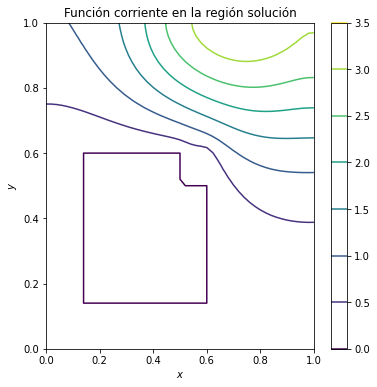

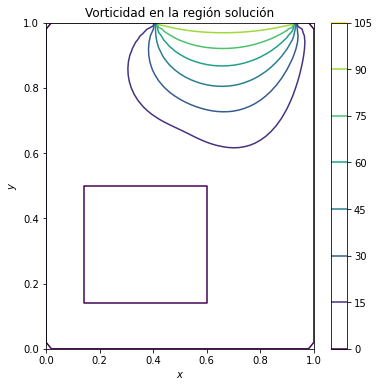

In [22]:
fig1 = plt.figure(figsize=(6,6))
gr_1 = fig1.add_subplot(1,1,1)
gr_1.set_title("Función corriente en la región solución")
gr_1.set_xlabel("$x$")
gr_1.set_ylabel("$y$")
c= gr_1.contour(X,Y, U)
fig1.colorbar(c, ax = gr_1)

fig2 = plt.figure(figsize=(6,6))
gr_2 = fig2.add_subplot(1,1,1)
gr_2.set_title("Vorticidad en la región solución")
gr_2.set_xlabel("$x$")
gr_2.set_ylabel("$y$")
c1= gr_2.contour(X,Y, W)
fig2.colorbar(c1, ax = gr_2)

Text(0, 0.5, '$y$')

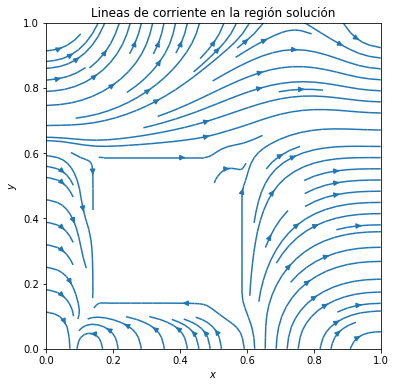

In [23]:
v_x = np.zeros((N,N))
v_y = np.zeros((N,N))

for i in range(1,len(x)-1):
    for j in range(1,len(y)-1):
        v_x[i,j] = (U[i+1,j]-U[i-1,j])/(2*h)
        v_y[i,j] = (U[i,j+1]-U[i,j-1])/(2*h)
        
fig3 = plt.figure(figsize=(6,6))
gr_3 = fig3.add_subplot(111)
gr_3.set_title("Lineas de corriente en la región solución")
gr_3.streamplot(X,Y,v_x,v_y)
gr_3.set_xlabel("$x$")
gr_3.set_ylabel("$y$")


### Disclaimer: Por reducir costos computacionales solo se realizaron 1000 iteraciones para la simulación.